# Cluster similar Houses

In [71]:
# importing necessary libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from matplotlib import rc_context, rcParams
%matplotlib inline


In [72]:
df = pd.read_csv('/Users/sahreenhaider/Documents/GitHub/data-science-complete-tutorial/Data/house_rental_data.csv.txt')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


### Data Preprocessing

In [73]:
# cehecking for all datatypes of the features of the dataset/ need to ensure that everything is numerical
df.dtypes

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [74]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

### checking the correlation

In [75]:
df.corr()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,1.000000,-0.065182,-0.021299,-0.039687,-0.008638,-0.027035,-0.007877,-0.077512
Sqft,-0.065182,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,-0.021299,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,-0.039687,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,-0.008638,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,-0.027035,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,-0.007877,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,-0.077512,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


#### checking the plots to lookout for ouliers

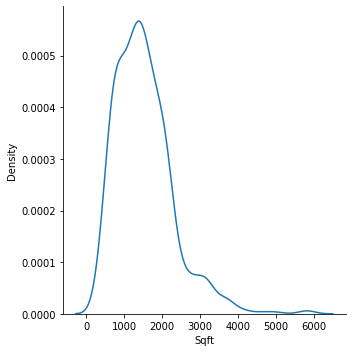

In [76]:
# displot of the feature Sqft from the dataset
with rc_context({'figure.facecolor':'white'}):
    sns.displot(df['Sqft'],kind='kde')

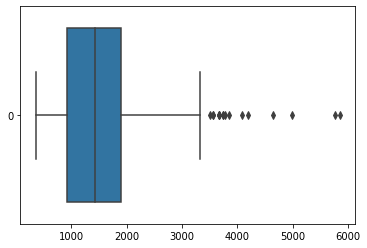

In [77]:
# box-plot of Sqft feature from the dataset in horizontal orientation
with rc_context({'figure.facecolor':'white'}):
    sns.boxplot(df['Sqft'],orient='h');

In [78]:
df['Sqft'].loc[df['Sqft']>df['Sqft'].quantile(0.93)] = (df['Sqft'].loc[df['Sqft']<df['Sqft'].quantile(0.93)]).mean()

/var/folders/m7/2q2nw8bx5jvc18fd_ry4hq840000gn/T/ipykernel_5336/44920994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sqft'].loc[df['Sqft']>df['Sqft'].quantile(0.93)] = (df['Sqft'].loc[df['Sqft']<df['Sqft'].quantile(0.93)]).mean()


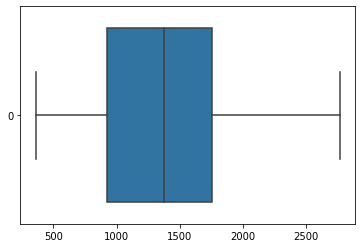

In [79]:
# box-plot of Sqft feature from the dataset in horizontal orientation
with rc_context({'figure.facecolor':'white'}):
    sns.boxplot(df['Sqft'],orient='h');

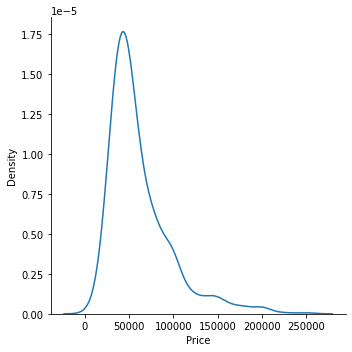

In [80]:
# displot for the feature Price from the dataset
with rc_context({'figure.facecolor':'white'}):
    sns.displot(df['Price'],kind='kde');

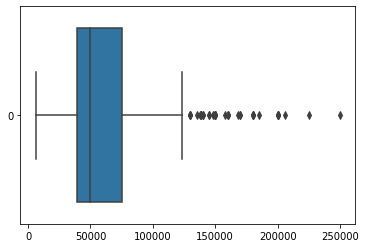

In [81]:
# Box-Plot of the feature Price for the the dataset
with rc_context({'figure.facecolor':'white'}):
    sns.boxplot(df["Price"],orient='h')

In [82]:
df['Price'].loc[df['Price']>df['Price'].quantile(0.90)] = (df['Price'].loc[df['Price']<df['Price'].quantile(0.90)]).mean()

/var/folders/m7/2q2nw8bx5jvc18fd_ry4hq840000gn/T/ipykernel_5336/2839488763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'].loc[df['Price']>df['Price'].quantile(0.90)] = (df['Price'].loc[df['Price']<df['Price'].quantile(0.90)]).mean()


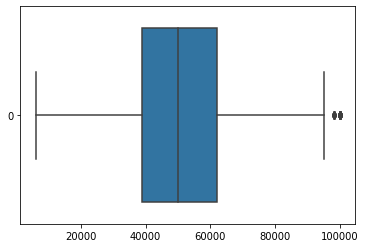

In [83]:
# Box-Plot of the feature Price for the the dataset
with rc_context({'figure.facecolor':'white'}):
    sns.boxplot(df["Price"],orient='h')

In [84]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [85]:
# with rc_context({'figure.facecolor':'white'}):
#     plt.figure(figsize=(10,8))
#     sns.boxplot(df[['Bedroom','Bathroom']], orient='h')

In [86]:
# with rc_context({'figure.facecolor':'white'}):
#     plt.figure(figsize=(10,8))
#     sns.boxplot(df[['Bathroom']])

In [87]:
# with rc_context({'figure.facecolor':'white'}):
#     plt.figure(figsize=(10,8))
#     sns.distplot(df[['Bathroom']])

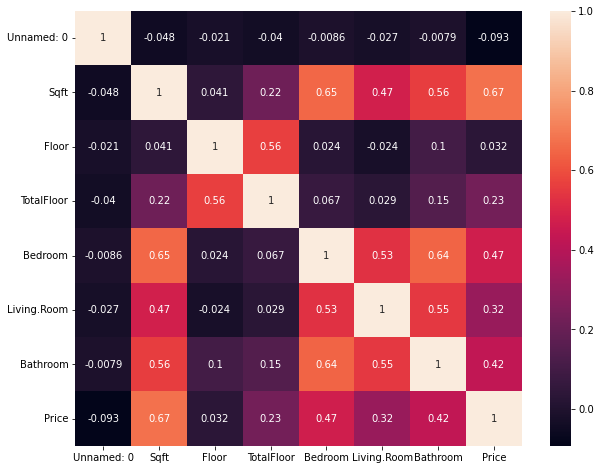

In [89]:
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(),annot=True)

In [90]:
# np.percentile(df[['Bathroom']],75 , interpolation='midpoint')

In [91]:
# stats.iqr(df['Bathroom'],interpolation='midpoint')

In [92]:
# z = np.abs(stats.zscore(df['Bathroom']))
# threshold = 3
# print(np.where(z>3))

In [93]:
# df['Bathroom'].loc[621]

In [94]:
# scaling the data 
scaler = StandardScaler()

In [95]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [96]:
df.rename(columns={'Unnamed: 0':'Index'}, inplace=True)

In [97]:
df.set_index('Index',inplace=True)

In [98]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Index,,,,,,,
1,1177.698,2,7,2,2,2,62000.0
2,2134.800,5,7,4,2,2,78000.0
3,1138.560,5,7,2,2,1,58000.0
4,1458.780,2,7,3,2,2,45000.0
5,967.776,11,14,3,2,2,45000.0


In [99]:
df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom','Price']] = scaler.fit_transform(df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom','Price']])

In [100]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Index,,,,,,,
1,-0.391932,-1.014897,-0.772347,-0.828956,0.402694,0.276918,0.463304
2,1.414160,-0.242042,-0.772347,1.151328,0.402694,0.276918,1.268865
3,-0.465788,-0.242042,-0.772347,-0.828956,0.402694,-1.187117,0.261914
4,0.138481,-1.014897,-0.772347,0.161186,0.402694,0.276918,-0.392604
5,-0.788064,1.303669,0.629803,0.161186,0.402694,0.276918,-0.392604


In [101]:
df.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.040825,0.215455,0.651136,0.473889,0.558733,0.671401
Floor,0.040825,1.000000,0.564221,0.023986,-0.023563,0.099772,0.032078
TotalFloor,0.215455,0.564221,1.000000,0.067298,0.029373,0.146132,0.230210
Bedroom,0.651136,0.023986,0.067298,1.000000,0.526532,0.643083,0.467748
Living.Room,0.473889,-0.023563,0.029373,0.526532,1.000000,0.546826,0.322641
Bathroom,0.558733,0.099772,0.146132,0.643083,0.546826,1.000000,0.423836
Price,0.671401,0.032078,0.230210,0.467748,0.322641,0.423836,1.000000


In [102]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

# Making a seperate array file having data for Annual income and spending score
array1 = df['Price'].to_numpy()
array3 =df['Sqft'].to_numpy()
array = np.array(list(zip(array1, array3))).reshape(len(array1), 2)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(array)
    kmeanModel.fit(array)

    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 1.2120969533636667
2 : 0.8260899397337135
3 : 0.6423168088770795
4 : 0.5467487812332501
5 : 0.5162321063807697
6 : 0.4733502685176786
7 : 0.4280114100342073
8 : 0.39661352230751423
9 : 0.365041466219948
10 : 0.34762985347817627
11 : 0.3280563732364595
12 : 0.3183333926277209
13 : 0.3081053128884735
14 : 0.29463282559394577


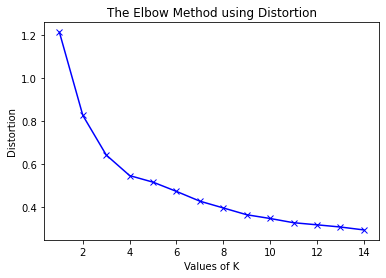

In [103]:
# Using Distortion -
# Tabulating the results -

for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -

with rc_context({'figure.facecolor':'white'}):
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

1 : 1289.9999999999998
2 : 536.8444986390666
3 : 342.356881364075
4 : 251.45480779852625
5 : 213.80825242400275
6 : 182.8170897187622
7 : 154.99499688070338
8 : 133.94165774693852
9 : 116.56876455002903
10 : 104.69967041096372
11 : 92.42127738768608
12 : 83.23495900195104
13 : 78.95225736212069
14 : 72.17544260919777


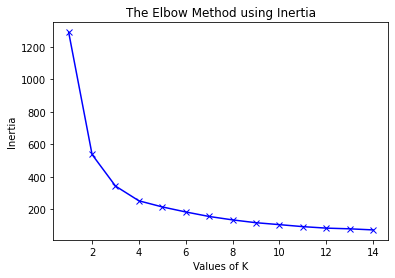

In [104]:
# Using Inertias -
# Tabulating the results -

for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -
with rc_context({'figure.facecolor':'white'}):
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

In [105]:
array[:5]

array([[ 0.46330426, -0.39193242],
       [ 1.26886495,  1.41416026],
       [ 0.26191409, -0.46578751],
       [-0.39260398,  0.13848142],
       [-0.39260398, -0.78806427]])

[[-0.50829998 -1.16143886]
 [ 0.94947062  0.55839237]
 [-0.78500069 -0.3037004 ]
 [-0.03651633  0.67057377]
 [ 2.18055407  1.29703653]
 [ 0.04559001  1.68011319]
 [-1.317895   -1.3251922 ]
 [ 2.03973417  0.01775338]
 [-0.04490859 -0.05286462]
 [ 1.15959471  1.50758623]]


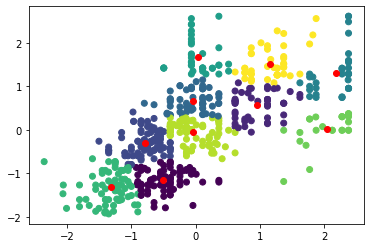

In [108]:
# Finding Centroids -
data = pd.DataFrame(array, columns=('Price','Sqft'))
data.head()

kmeans = KMeans(n_clusters=10).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Price'], df['Sqft'], c= kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()